In [4]:
import matplotlib
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from genFillNulls import *
import warnings #to remove the warnings
warnings.filterwarnings('ignore')

In [15]:
'''WBC DATASET - 699 x 11'''

raw_wbc = pd.read_csv('breast-cancer-wisconsin.data', header=None)
wbc_cols = ['ID', 'Thickness', 'SizeUniformity', 'ShapeUniformity', 'Adhesion', 'Size', 'BareNuclei', 'Bland Chromatin', 'Nucleoli', 'Mitoses', 'Diagnosis']
raw_wbc.columns = wbc_cols
raw_wbc['Diagnosis'] = raw_wbc['Diagnosis'].map(
                   {2:0,4:1})
temp = []
for index, row in raw_wbc.iterrows():
    if '?' not in row.values:
        temp.append(row)
        
wbc_df = pd.DataFrame(np.array(temp), columns=wbc_cols)
for i in wbc_cols:
        wbc_df[i] = wbc_df[i].astype(np.int)

''' WBDC Dataset - 569 x 32'''

wdbc_cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
wdbc_df = pd.read_csv('wdbc.data', header=None)

wdbc_df.columns = wdbc_cols
wdbc_df['Diagnosis'] = wdbc_df['Diagnosis'].map(
                   {'M':True,'B':False})


''' WBDC Dataset - 858 x 36'''

cervical_df = pd.read_csv('risk_factors_cervical_cancer.csv')

cervicalCols = ['Age', 'Number of sexual partners', 'First sexual intercourse',
                'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
                'IUD (years)', 'STDs (number)', 'STDs:condylomatosis',
                'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
                'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
                'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
                'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
                'Dx:Cancer', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology',
                'Biopsy']

cervical_df = pd.read_csv('risk_factors_cervical_cancer.csv')
cervical_df = cervical_df[cervicalCols]
cervicalAllNullsRemoved = removeEntriesWithNulls(cervical_df)
print(cervicalAllNullsRemoved.shape)

cervical_df = pd.read_csv('risk_factors_cervical_cancer.csv')
cervical_df = cervical_df[cervicalCols]
cervicalAllNullsSyntheticFilled = genSyntheticFillNulls(cervical_df)
print(cervicalAllNullsSyntheticFilled.shape)

for i in cervicalAllNullsSyntheticFilled:
        cervicalAllNullsSyntheticFilled[i] = cervicalAllNullsSyntheticFilled[i].astype(np.float)

(59, 32)
(858, 32)


Correlation Matrix Size: (32, 32)
Number of Entries: 1024
Correlations Over 90: 31.5
Correlations Over 80: 54.5


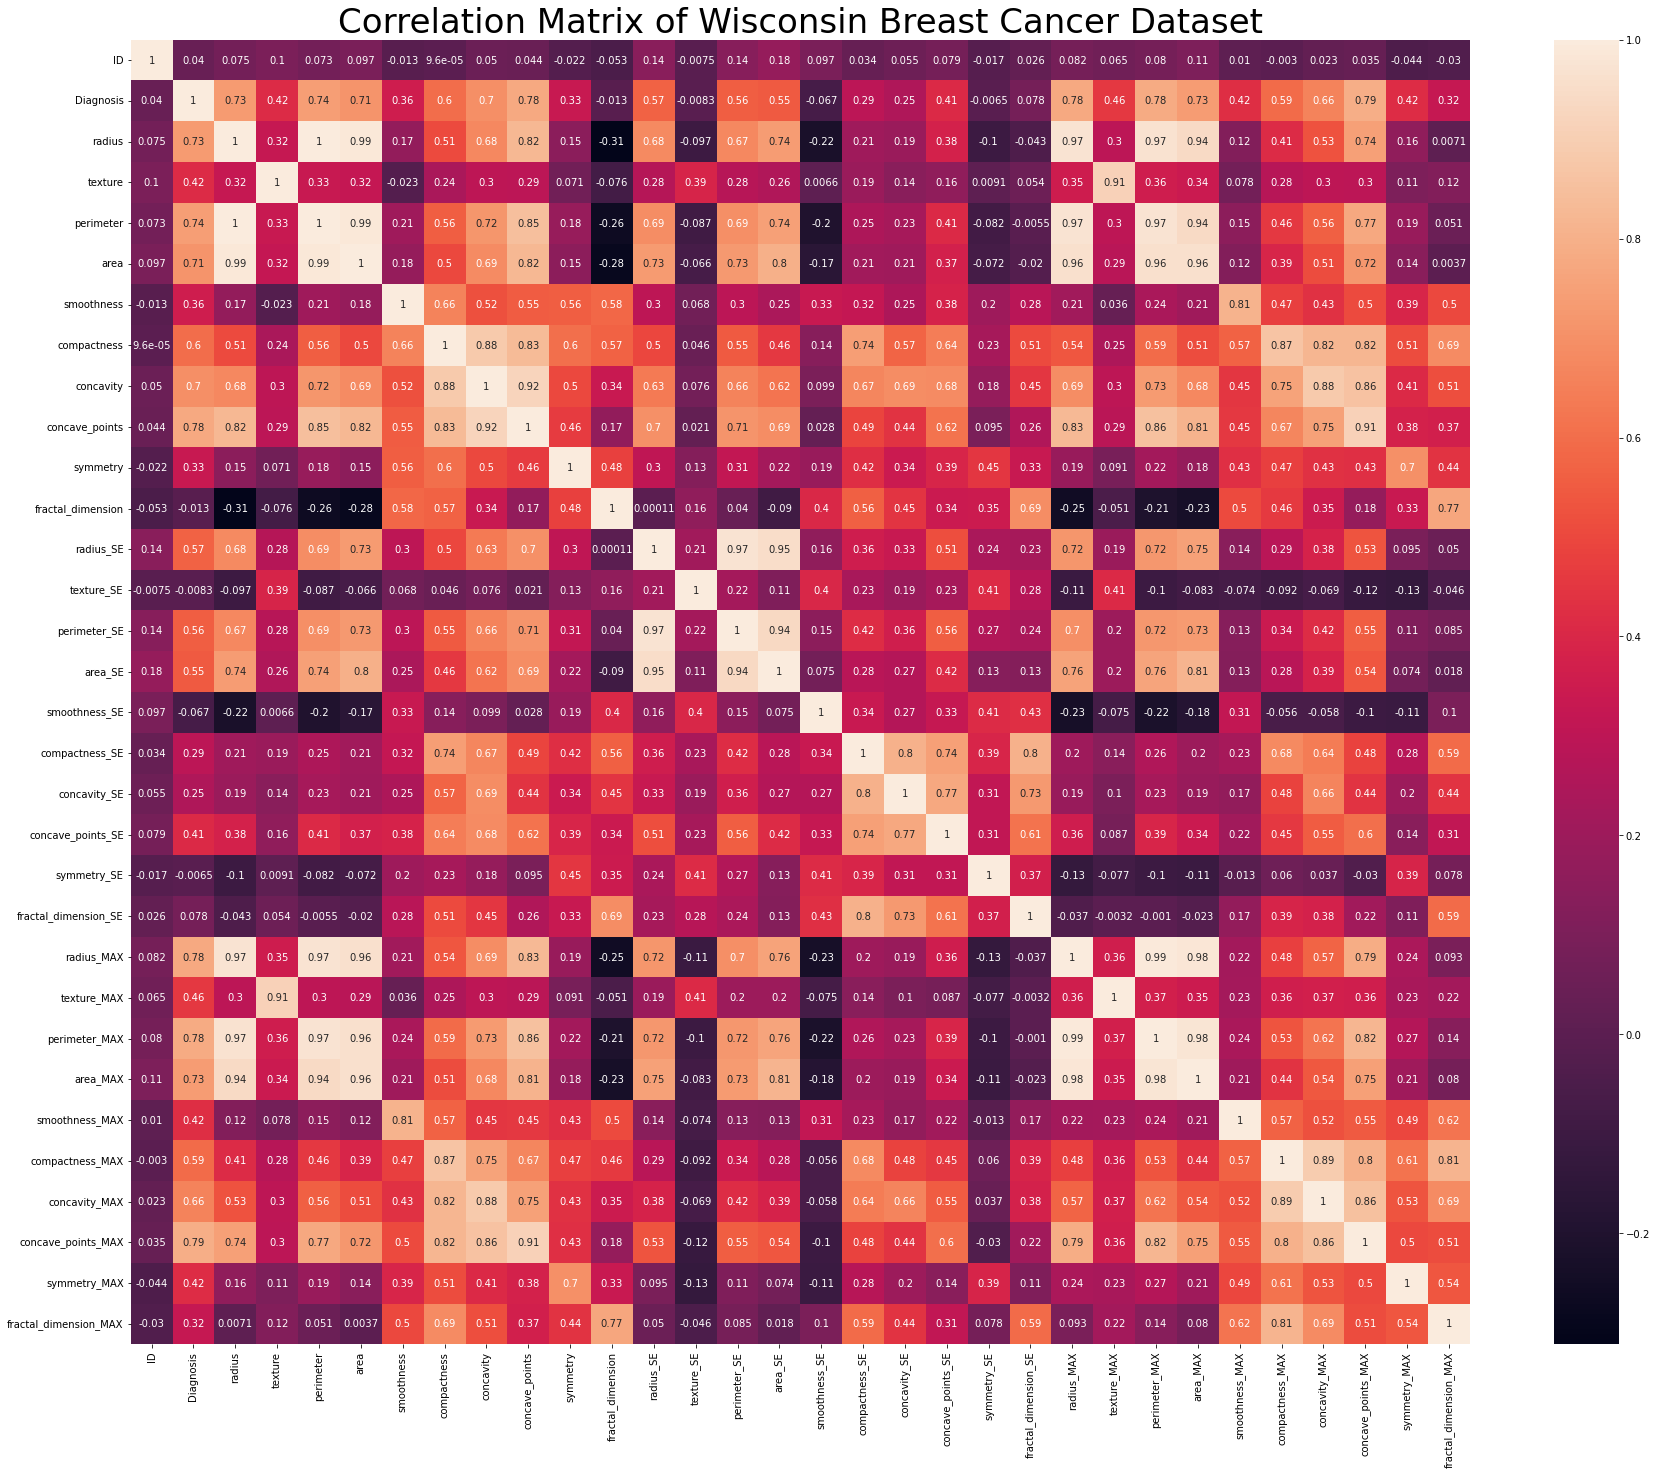

In [7]:
corrMatrix = wdbc_df.corr()
numbersAbove90 = 0
numbersAbove80 = 0
for index, row in corrMatrix.iterrows():
    for cell in row:
        if cell > 0.9:
            numbersAbove90 += 1
        if cell > 0.8:
            numbersAbove80 += 1

print('Correlation Matrix Size: {}'.format(corrMatrix.shape))
print('Number of Entries: {}'.format(corrMatrix.shape[0] * corrMatrix.shape[1]))
print('Correlations Over 90: {}'.format((numbersAbove90 - len(wbc_cols))/2))
print('Correlations Over 80: {}'.format((numbersAbove80 - len(wbc_cols))/2))
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (30, 24)
plt.title('Correlation Matrix of Wisconsin Breast Cancer Dataset', fontdict={'fontsize': 34})
plt.show()


Correlation Matrix Size: (11, 11)
Number of Entries: 121
Correlations Over 90: 1.0
Correlations Over 80: 4.0


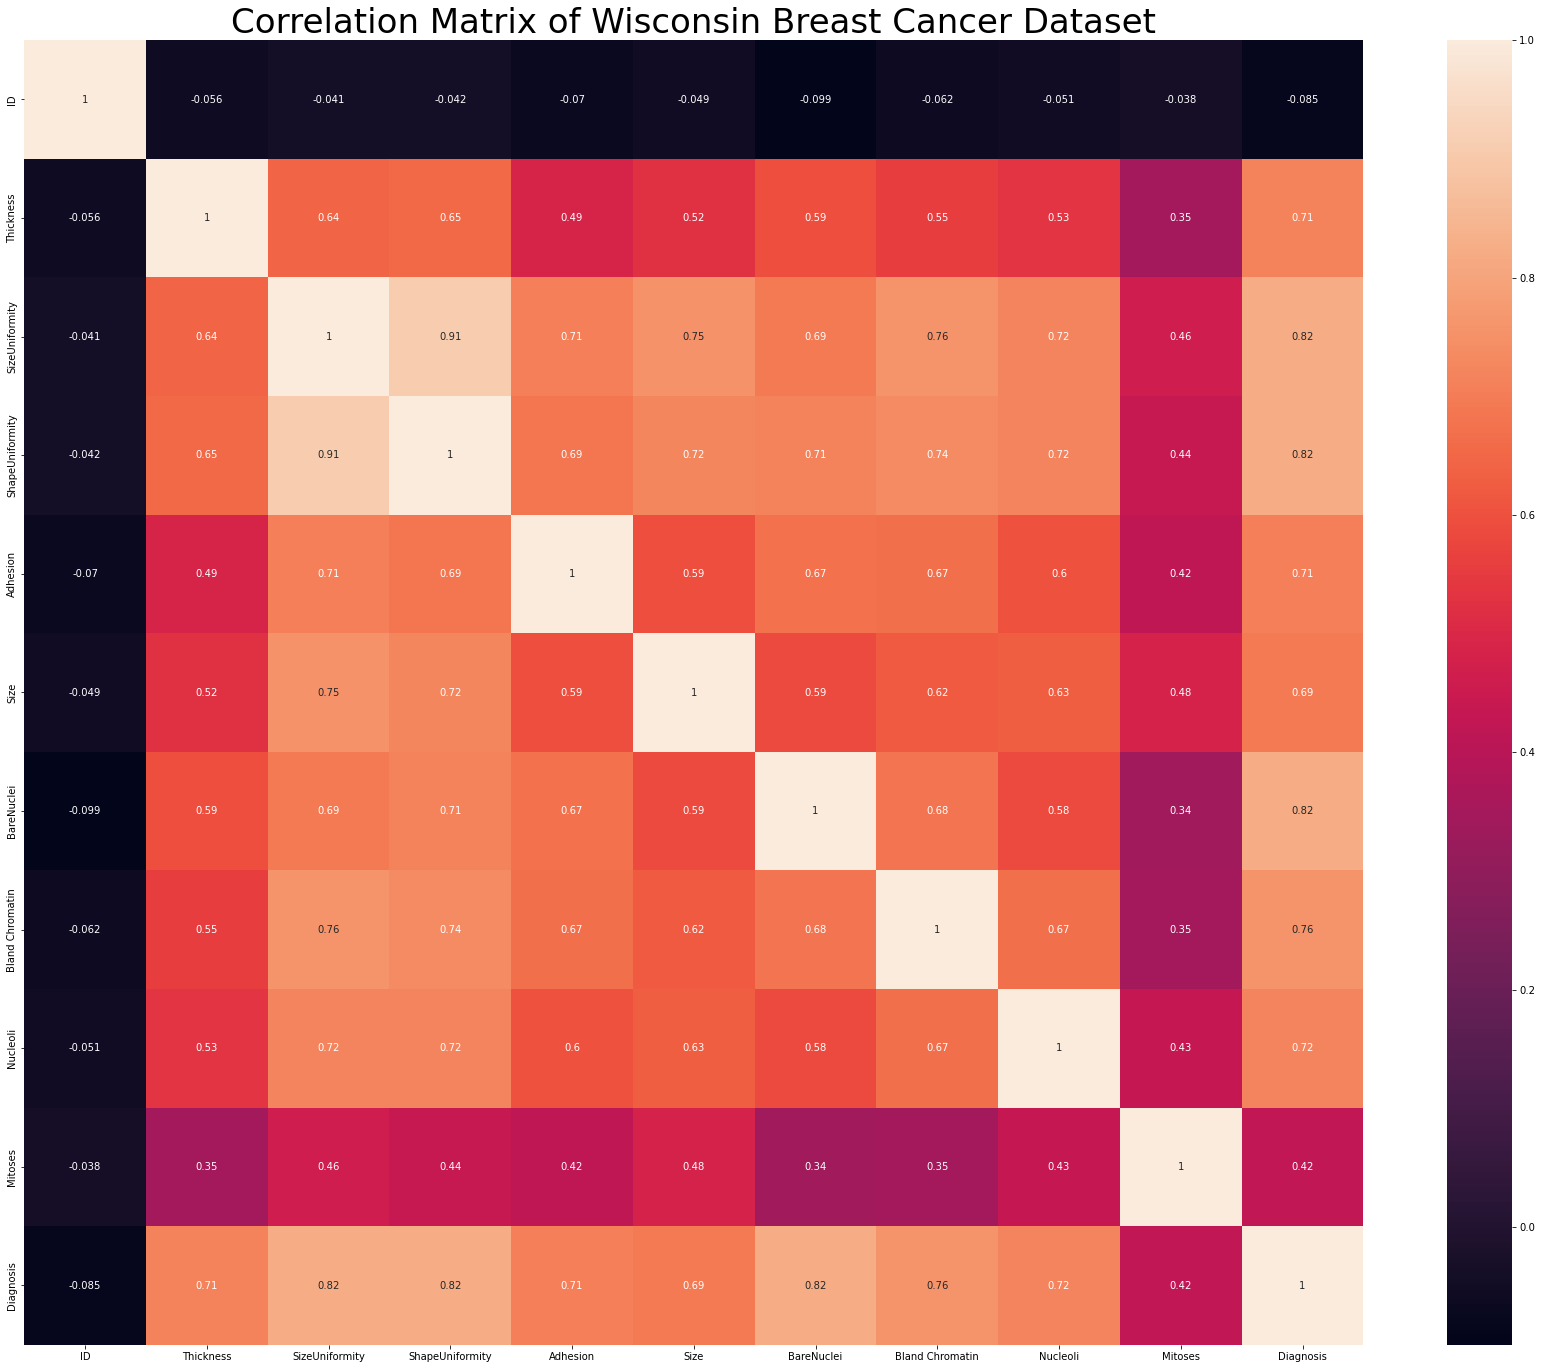

In [8]:
corrMatrix = wbc_df.corr()
numbersAbove90 = 0
numbersAbove80 = 0
for index, row in corrMatrix.iterrows():
    for cell in row:
        if cell > 0.9:
            numbersAbove90 += 1
        if cell > 0.8:
            numbersAbove80 += 1

print('Correlation Matrix Size: {}'.format(corrMatrix.shape))
print('Number of Entries: {}'.format(corrMatrix.shape[0] * corrMatrix.shape[1]))
print('Correlations Over 90: {}'.format((numbersAbove90 - len(wbc_cols))/2))
print('Correlations Over 80: {}'.format((numbersAbove80 - len(wbc_cols))/2))
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (30, 24)
plt.title('Correlation Matrix of Wisconsin Breast Cancer Dataset', fontdict={'fontsize': 34})
plt.show()


Correlation Matrix Size: (32, 32)
Number of Entries: 1024
Correlations Over 90: 18.5
Correlations Over 80: 21.5


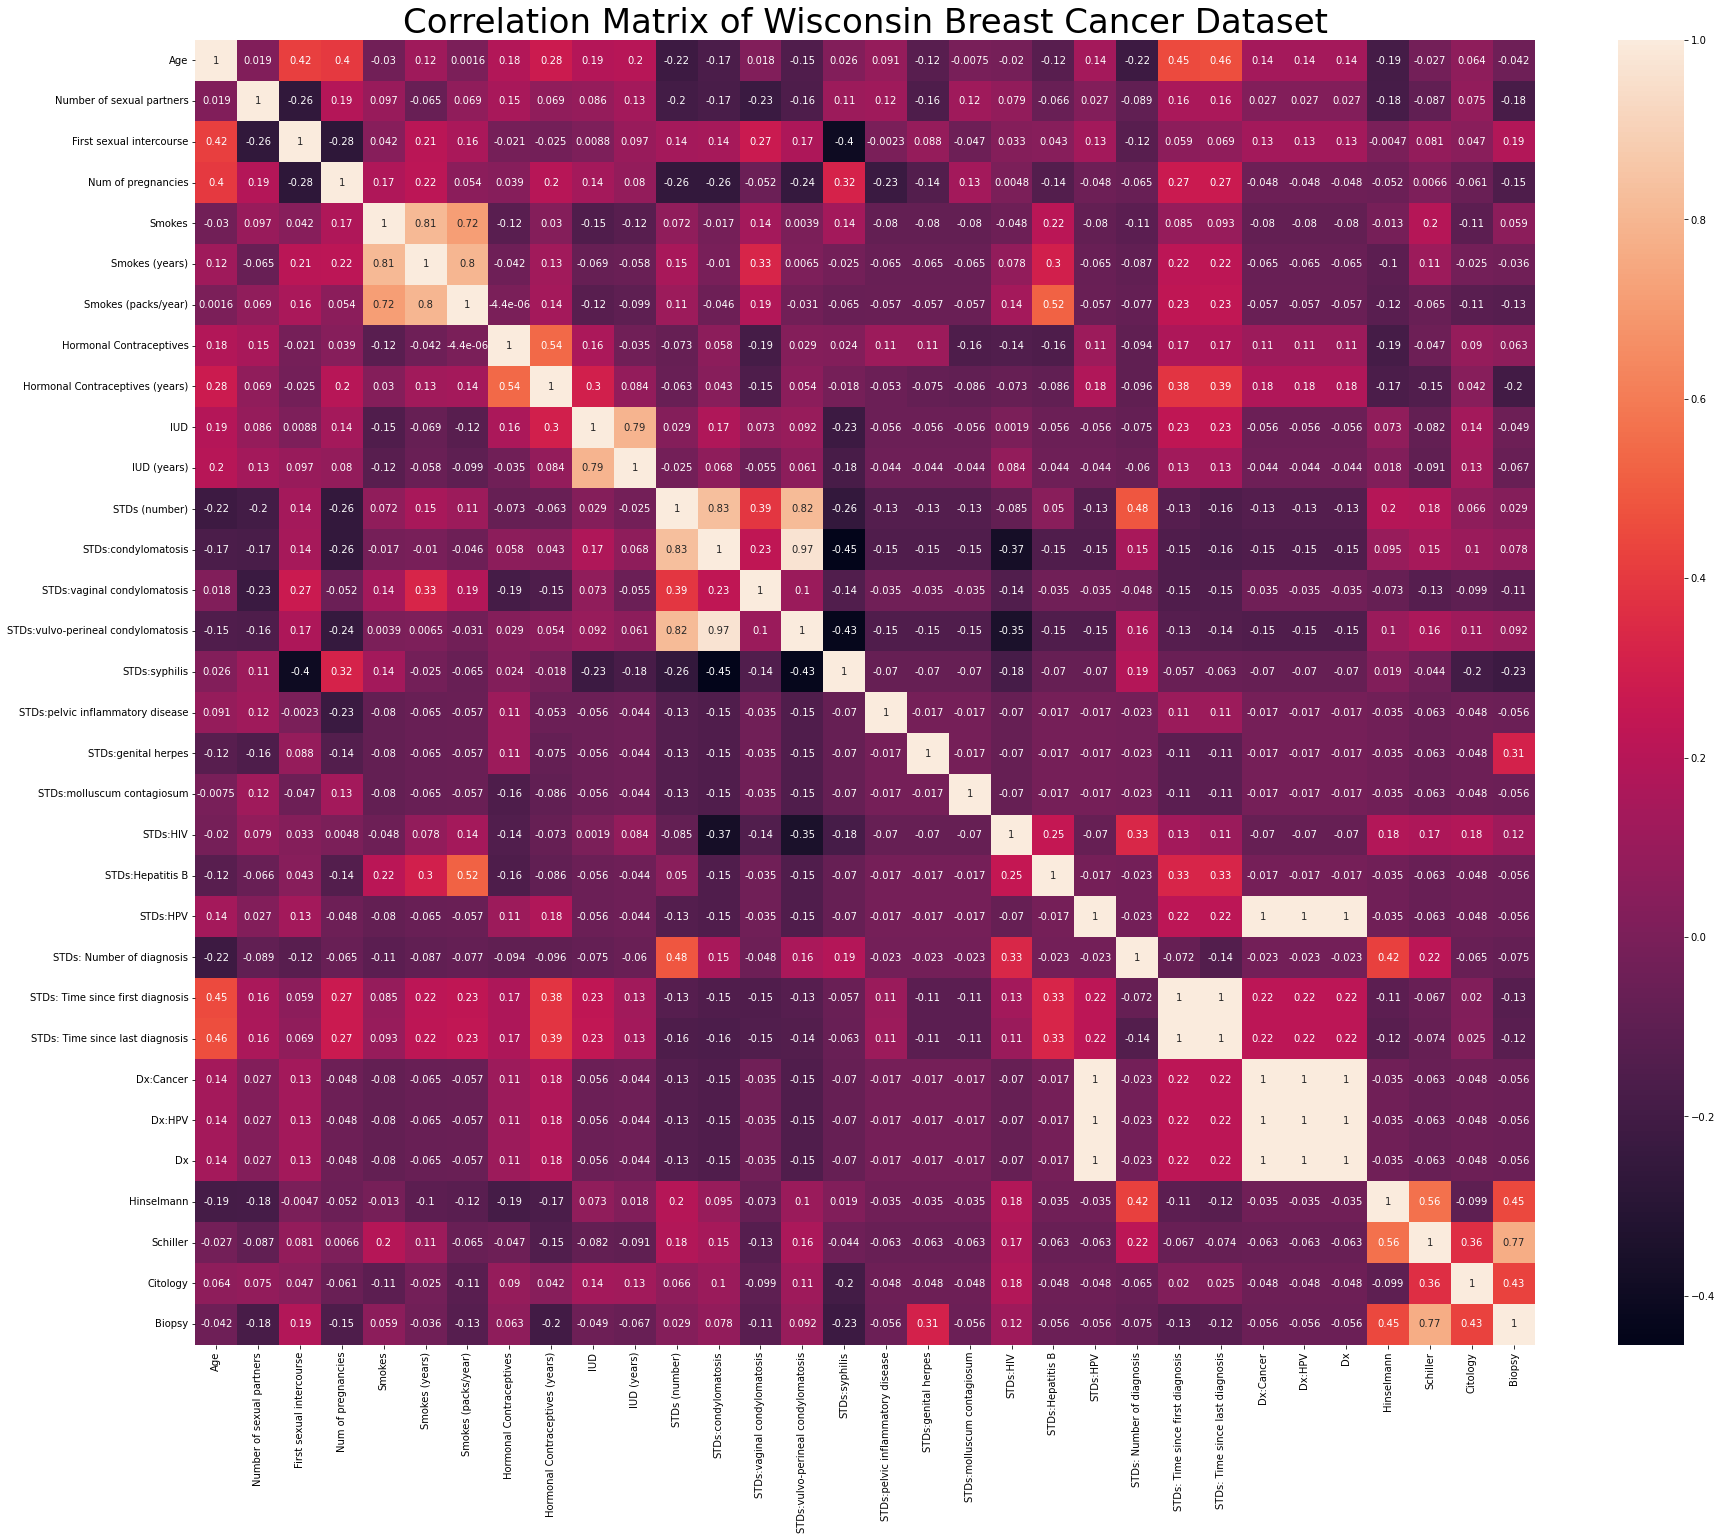

In [9]:
corrMatrix = cervicalAllNullsRemoved.corr()
numbersAbove90 = 0
numbersAbove80 = 0
for index, row in corrMatrix.iterrows():
    for cell in row:
        if cell > 0.9:
            numbersAbove90 += 1
        if cell > 0.8:
            numbersAbove80 += 1

print('Correlation Matrix Size: {}'.format(corrMatrix.shape))
print('Number of Entries: {}'.format(corrMatrix.shape[0] * corrMatrix.shape[1]))
print('Correlations Over 90: {}'.format((numbersAbove90 - len(wbc_cols))/2))
print('Correlations Over 80: {}'.format((numbersAbove80 - len(wbc_cols))/2))
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (30, 24)
plt.title('Correlation Matrix of Wisconsin Breast Cancer Dataset', fontdict={'fontsize': 34})
plt.show()

Correlation Matrix Size: (32, 32)
Number of Entries: 1024
Correlations Over 90: 0.0
Correlations Over 80: 4.0


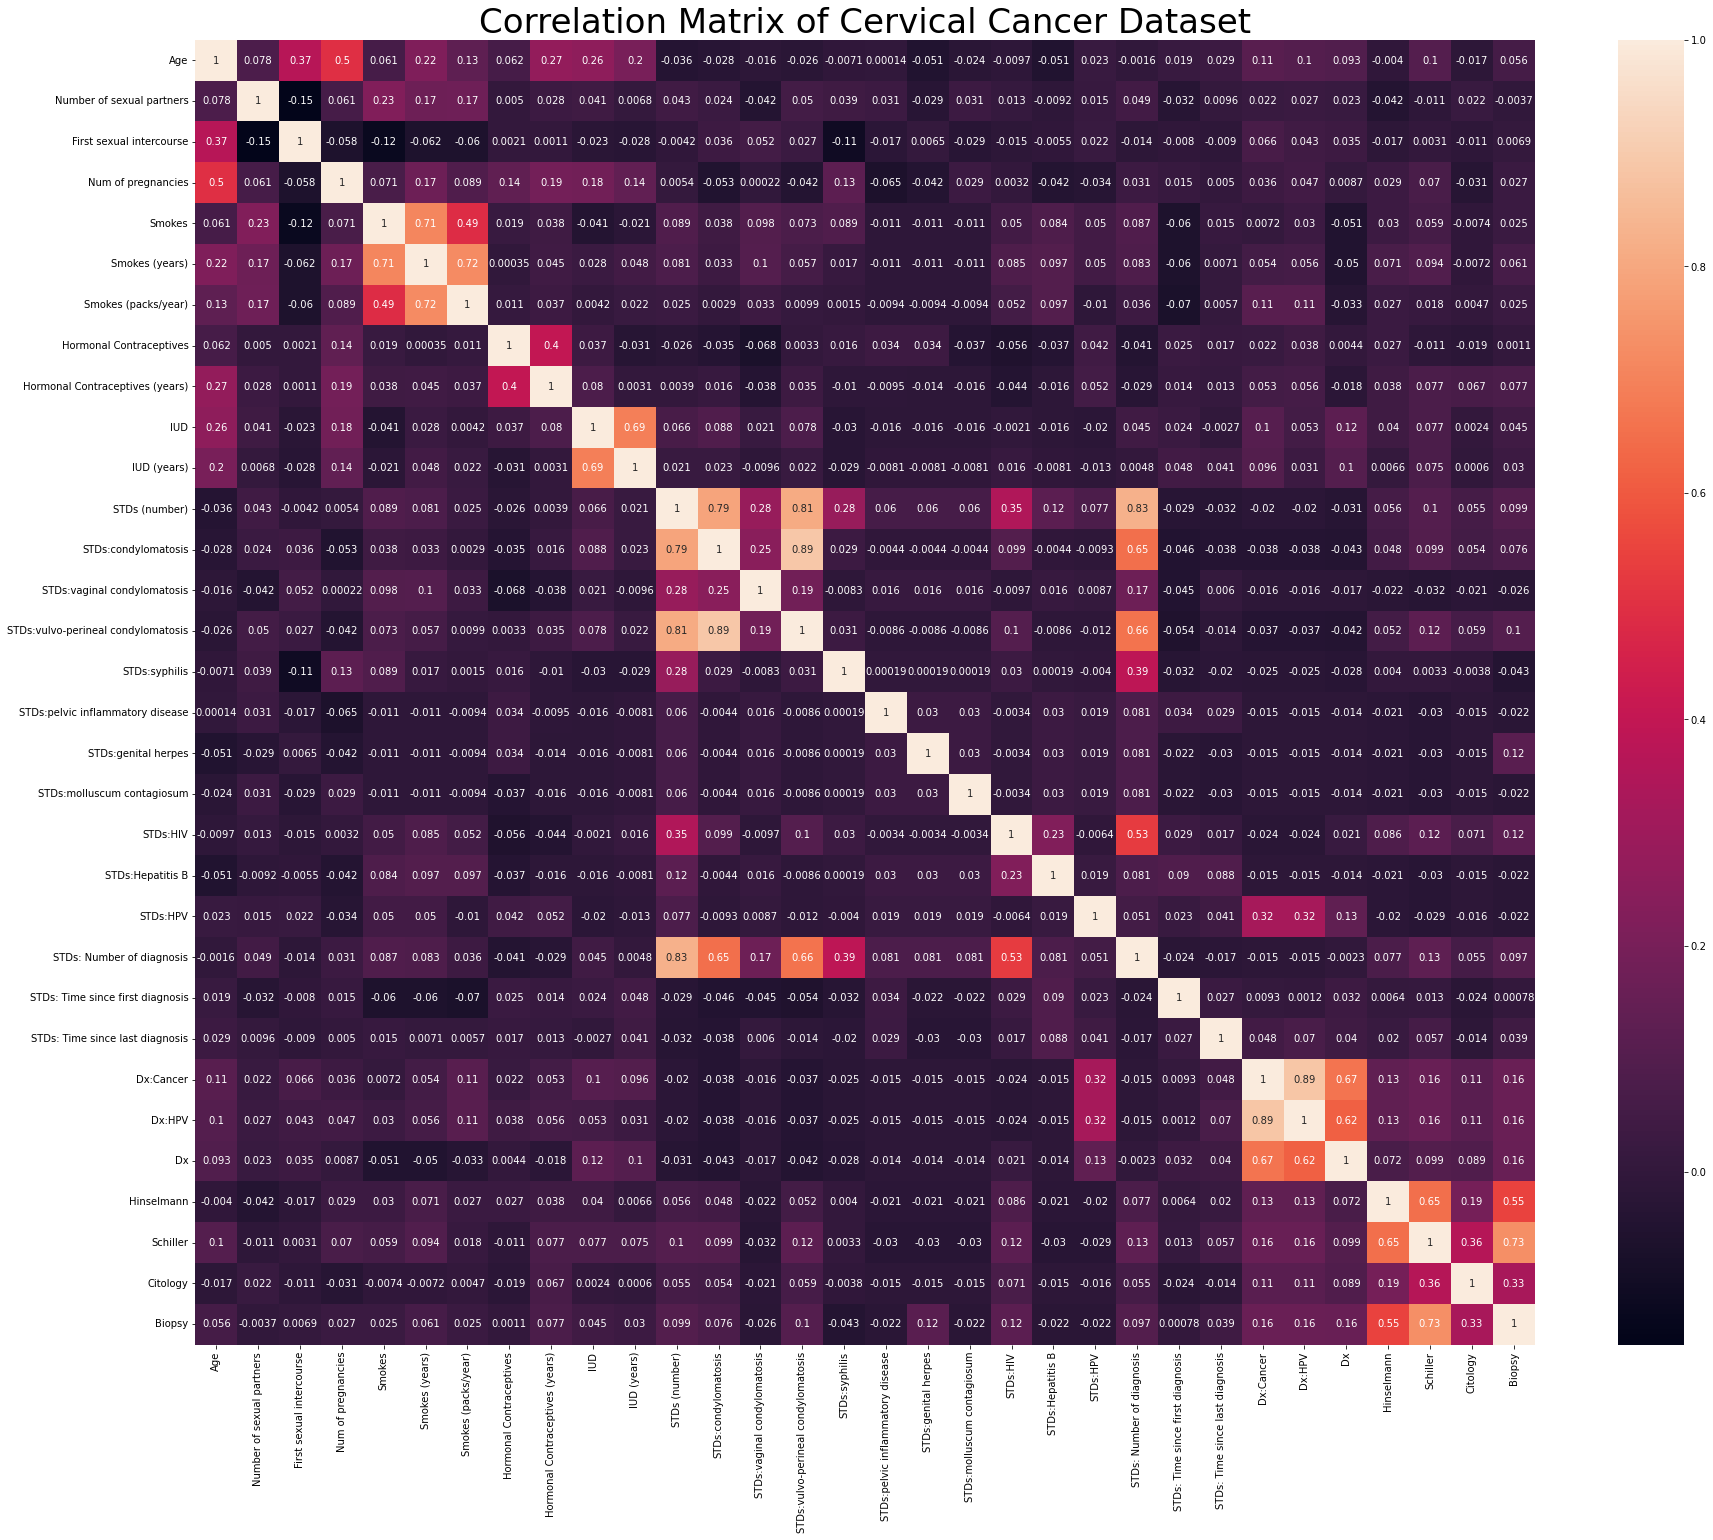

In [19]:
corrMatrix = cervicalAllNullsSyntheticFilled.corr()
numbersAbove90 = 0
numbersAbove80 = 0
for index, row in corrMatrix.iterrows():
    for cell in row:
        if cell > 0.9:
            numbersAbove90 += 1
        if cell > 0.8:
            numbersAbove80 += 1

print('Correlation Matrix Size: {}'.format(corrMatrix.shape))
print('Number of Entries: {}'.format(corrMatrix.shape[0] * corrMatrix.shape[1]))
print('Correlations Over 90: {}'.format((numbersAbove90 - len(cervicalCols))/2))
print('Correlations Over 80: {}'.format((numbersAbove80 - len(cervicalCols))/2))
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (30, 24)
plt.title('Correlation Matrix of Cervical Cancer Dataset', fontdict={'fontsize': 34})
plt.show()